In [35]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import json
import ast
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


gdf = gpd.read_file('./GAUL_2024_L1/GAUL_2024_L1.shp')
gdf2 = gpd.read_file('./GAUL_2024_L2/GAUL_2024_L2.shp')
df = pd.read_excel("EM_DAT_EUROPE_NaturalDis.xlsx")

In [2]:
df_grouped = df.groupby(['Start Year', 'Disaster Type']).size().unstack(fill_value=0)

In [ ]:
df

In [ ]:
df_grouped

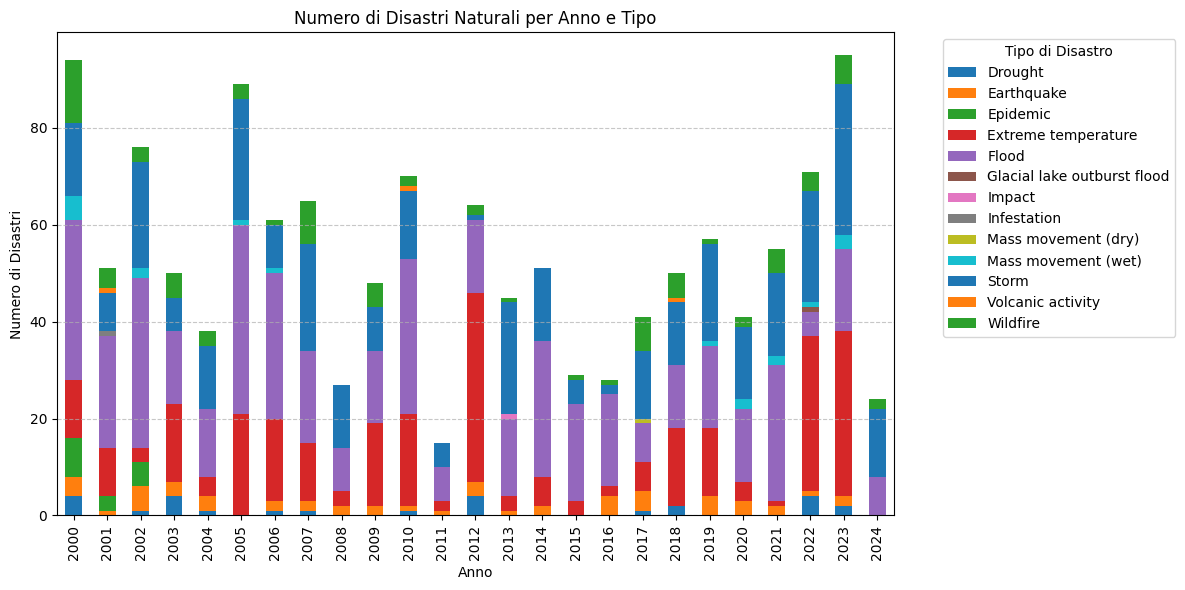

In [3]:
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.ylabel('Numero di Disastri')
plt.xlabel('Anno')
plt.title('Numero di Disastri Naturali per Anno e Tipo')
plt.legend(title='Tipo di Disastro', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [6]:
df_grouped = df.groupby(['Start Year', 'Disaster Type']).size().reset_index(name='Cantidad')

fig = px.bar(
    df_grouped,
    x='Start Year',
    y='Cantidad',
    color='Disaster Type',
    title='Numero di Disastri Naturali per Anno e Tipo',
    labels={'Cantidad': 'Numero di Disastri', 'Start Year': 'Anno', 'Disaster Type': 'Tipo di Disastro'},
)

fig.update_layout(
    barmode='stack',
    xaxis=dict(type='category'),
    legend_title_text='Tipo di Disastro',
    hovermode='x unified'
)

fig.show()


In [5]:
import altair as alt

df_grouped = df.groupby(['Start Year', 'Disaster Type']).size().reset_index(name='Cantidad')

chart = alt.Chart(df_grouped).mark_bar().encode(
    x='Start Year:O',
    y='Cantidad:Q',
    color='Disaster Type:N',
    tooltip=['Start Year', 'Disaster Type', 'Cantidad']
).properties(
    width=800,
    height=400,
    title='Cantidad de Desastres Naturales por Año y Tipo'
).interactive()

chart


alt.Chart(...)

In [ ]:
gdf2

In [ ]:
df

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [53]:
all_admin1_rows = []

for index, row in df.iterrows():
    if pd.notna(row['Admin Units']):
        try:
            admin_units = json.loads(row['Admin Units'])
        except:
            try:
                admin_units = ast.literal_eval(row['Admin Units'])
            except:
                continue

        if isinstance(admin_units, list):
            for unit in admin_units:
                if 'adm1_name' in unit:
                    new_row = row.copy()
                    new_row['adm1_name'] = unit['adm1_name']
                    all_admin1_rows.append(new_row)

admin1_df = pd.DataFrame(all_admin1_rows)
admin1_df.head()


DisNo. Historic Classification Key Disaster Group Disaster Subgroup  \
0  2000-0028-ROU       No    nat-met-sto-bli        Natural    Meteorological   
0  2000-0028-ROU       No    nat-met-sto-bli        Natural    Meteorological   
0  2000-0028-ROU       No    nat-met-sto-bli        Natural    Meteorological   
0  2000-0028-ROU       No    nat-met-sto-bli        Natural    Meteorological   
0  2000-0028-ROU       No    nat-met-sto-bli        Natural    Meteorological   

  Disaster Type       Disaster Subtype External IDs Event Name  ISO  ...  \
0         Storm  Blizzard/Winter storm          NaN        NaN  ROU  ...   
0         Storm  Blizzard/Winter storm          NaN        NaN  ROU  ...   
0         Storm  Blizzard/Winter storm          NaN        NaN  ROU  ...   
0         Storm  Blizzard/Winter storm          NaN        NaN  ROU  ...   
0         Storm  Blizzard/Winter storm          NaN        NaN  ROU  ...   

  Reconstruction Costs, Adjusted ('000 US$) Insured Damage ('000 US$)  \
0                                       NaN                       NaN   
0                                       NaN                       NaN   
0                                       NaN                       NaN   
0                                       NaN                       NaN   
0                                       NaN                       NaN   

  Insured Damage, Adjusted ('000 US$) Total Damage ('000 US$)  \
0                                 NaN                     NaN   
0                                 NaN                     NaN   
0                                 NaN                     NaN   
0                                 NaN                     NaN   
0                                 NaN                     NaN   

  Total Damage, Adjusted ('000 US$)        CPI  \
0                               NaN  56.514291   
0                               NaN  56.514291   
0                               NaN  56.514291   
0                               NaN  56.514291   
0                               NaN  56.514291   

                                         Admin Units  Entry Date Last Update  \
0  [{"adm1_code":2450,"adm1_name":"Bihor"},{"adm1...  2003-07-01  2023-09-25   
0  [{"adm1_code":2450,"adm1_name":"Bihor"},{"adm1...  2003-07-01  2023-09-25   
0  [{"adm1_code":2450,"adm1_name":"Bihor"},{"adm1...  2003-07-01  2023-09-25   
0  [{"adm1_code":2450,"adm1_name":"Bihor"},{"adm1...  2003-07-01  2023-09-25   
0  [{"adm1_code":2450,"adm1_name":"Bihor"},{"adm1...  2003-07-01  2023-09-25   

   adm1_name  
0      Bihor  
0       Cluj  
0      Mures  
0      Salaj  
0  Satu Mare  

[5 rows x 47 columns]

In [54]:
def extract_from_admin_units(df:pd.DataFrame, key_to_search:str) -> pd.DataFrame:
    all_rows = []
    for index, row in df.iterrows():
        if pd.notna(row['Admin Units']):
            try:
                admin_units = json.loads(row['Admin Units'])
            except:
                try:
                    admin_units = ast.literal_eval(row['Admin Units'])
                except:
                    continue
            if isinstance(admin_units, list):
                for unit in admin_units:
                    if key_to_search in unit:
                        new_row = row.copy()
                        new_row[key_to_search] = unit[key_to_search]
                        all_rows.append(new_row)
    return pd.DataFrame(all_rows)

df_adm1 = extract_from_admin_units(df, 'adm1_name')
df_adm2 = extract_from_admin_units(df, 'adm2_name')


In [57]:
df_adm1 = df_adm1.merge(
    gdf[['iso3_code', 'gaul1_name', 'geometry']],
    left_on=['ISO', 'adm1_name'],
    right_on=['iso3_code', 'gaul1_name'],
    how='left'
)


In [56]:
df_adm1

DisNo. Historic Classification Key Disaster Group  \
0     2000-0028-ROU       No    nat-met-sto-bli        Natural   
1     2000-0028-ROU       No    nat-met-sto-bli        Natural   
2     2000-0028-ROU       No    nat-met-sto-bli        Natural   
3     2000-0028-ROU       No    nat-met-sto-bli        Natural   
4     2000-0028-ROU       No    nat-met-sto-bli        Natural   
...             ...      ...                ...            ...   
4972  2023-0289-RUS       No    nat-cli-wil-for        Natural   
4973  2023-0487-RUS       No    nat-met-sto-sto        Natural   
4974  2023-9234-ESP       No    nat-cli-dro-dro        Natural   
4975  2023-9234-ESP       No    nat-cli-dro-dro        Natural   
4976  2023-9234-ESP       No    nat-cli-dro-dro        Natural   

     Disaster Subgroup Disaster Type       Disaster Subtype External IDs  \
0       Meteorological         Storm  Blizzard/Winter storm          NaN   
1       Meteorological         Storm  Blizzard/Winter storm          NaN   
2       Meteorological         Storm  Blizzard/Winter storm          NaN   
3       Meteorological         Storm  Blizzard/Winter storm          NaN   
4       Meteorological         Storm  Blizzard/Winter storm          NaN   
...                ...           ...                    ...          ...   
4972    Climatological      Wildfire            Forest fire          NaN   
4973    Meteorological         Storm        Storm (General)          NaN   
4974    Climatological       Drought                Drought          NaN   
4975    Climatological       Drought                Drought          NaN   
4976    Climatological       Drought                Drought          NaN   

     Event Name  ISO  ... Total Damage ('000 US$)  \
0           NaN  ROU  ...                     NaN   
1           NaN  ROU  ...                     NaN   
2           NaN  ROU  ...                     NaN   
3           NaN  ROU  ...                     NaN   
4           NaN  ROU  ...                     NaN   
...         ...  ...  ...                     ...   
4972        NaN  RUS  ...                 50000.0   
4973        NaN  RUS  ...                     NaN   
4974        NaN  ESP  ...               2400000.0   
4975        NaN  ESP  ...               2400000.0   
4976        NaN  ESP  ...               2400000.0   

     Total Damage, Adjusted ('000 US$)         CPI  \
0                                  NaN   56.514291   
1                                  NaN   56.514291   
2                                  NaN   56.514291   
3                                  NaN   56.514291   
4                                  NaN   56.514291   
...                                ...         ...   
4972                           50000.0  100.000000   
4973                               NaN  100.000000   
4974                         2400000.0  100.000000   
4975                         2400000.0  100.000000   
4976                         2400000.0  100.000000   

                                            Admin Units  Entry Date  \
0     [{"adm1_code":2450,"adm1_name":"Bihor"},{"adm1...  2003-07-01   
1     [{"adm1_code":2450,"adm1_name":"Bihor"},{"adm1...  2003-07-01   
2     [{"adm1_code":2450,"adm1_name":"Bihor"},{"adm1...  2003-07-01   
3     [{"adm1_code":2450,"adm1_name":"Bihor"},{"adm1...  2003-07-01   
4     [{"adm1_code":2450,"adm1_name":"Bihor"},{"adm1...  2003-07-01   
...                                                 ...         ...   
4972  [{"adm1_code":2526,"adm1_name":"Kurganskaya Ob...  2023-05-19   
4973   [{"adm1_code":2532,"adm1_name":"Mariy-el Rep."}]  2023-07-31   
4974  [{"adm1_code":2716,"adm1_name":"Andalucía"},{"...  2023-04-19   
4975  [{"adm1_code":2716,"adm1_name":"Andalucía"},{"...  2023-04-19   
4976  [{"adm1_code":2716,"adm1_name":"Andalucía"},{"...  2023-04-19   

     Last Update               adm1_name iso3_code gaul2_name  \
0     2023-09-25                   Bihor       NaN        NaN   
1     2023-09-25                    Cl

In [49]:
gdf['gaul1_name_upper'] = gdf['gaul1_name'].str.upper()
df_adm1['adm1_name_upper'] = df_adm1['adm1_name'].str.upper()

In [50]:
df_adm1 = df_adm1.merge(
    gdf[['iso3_code', 'gaul1_name_upper', 'geometry']],
    left_on=['ISO', 'adm1_name_upper'],
    right_on=['iso3_code', 'gaul1_name_upper'],
    how='left'
)

In [ ]:
df_adm1

In [ ]:
gdf

In [21]:
world = gpd.read_file('./ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')
tipos_desastres = df['Disaster Type'].unique()

In [22]:
merged = world.merge(df, left_on='ISO_A3', right_on='ISO', how='left')

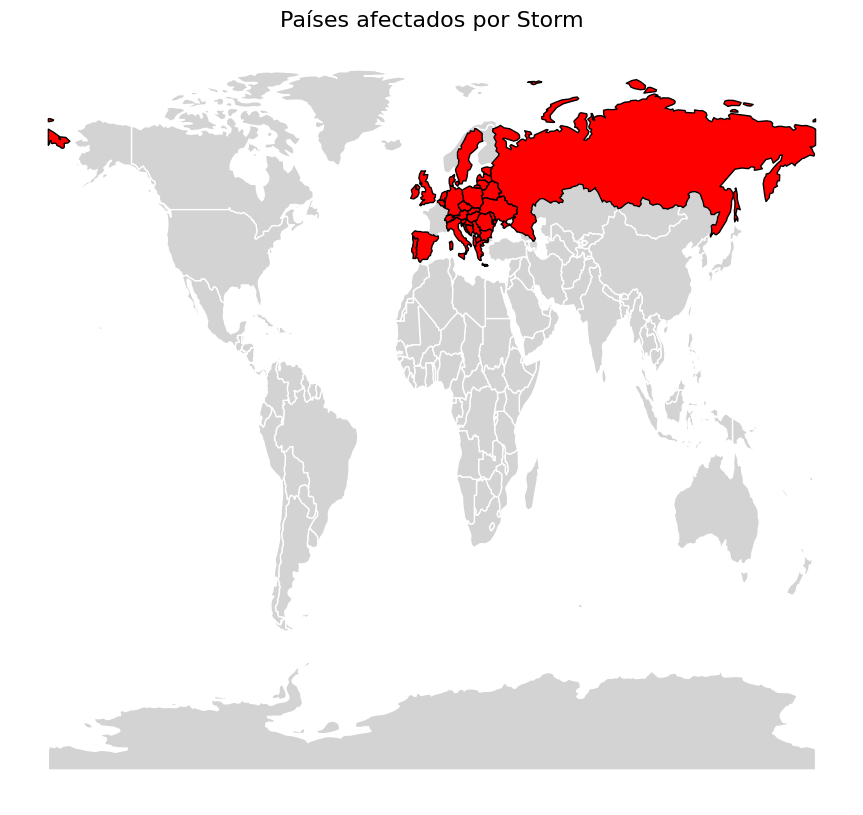

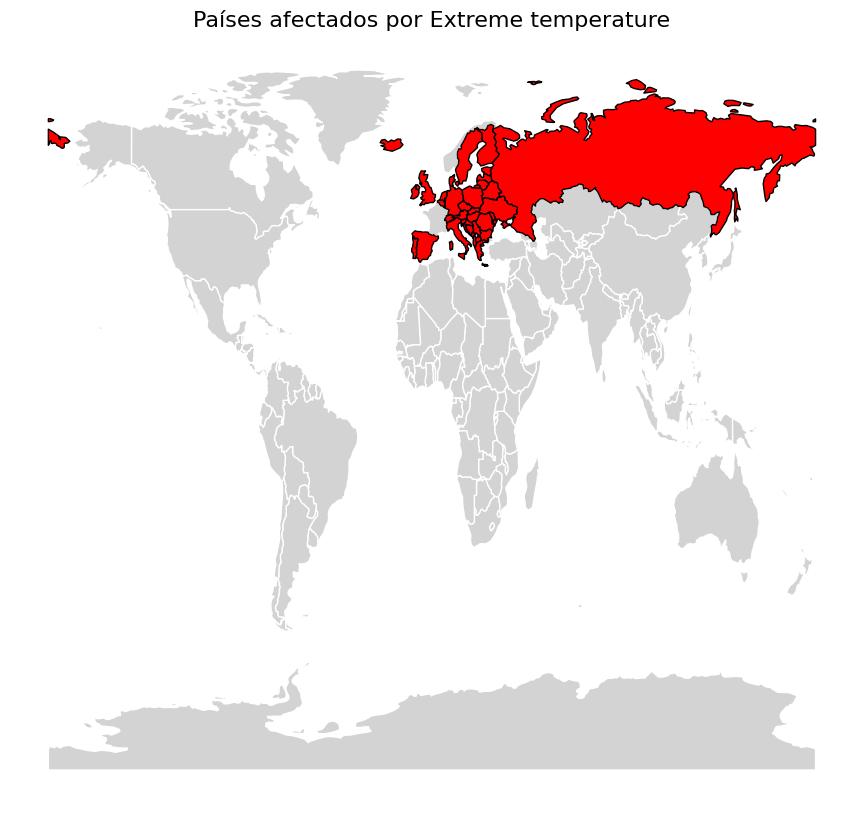

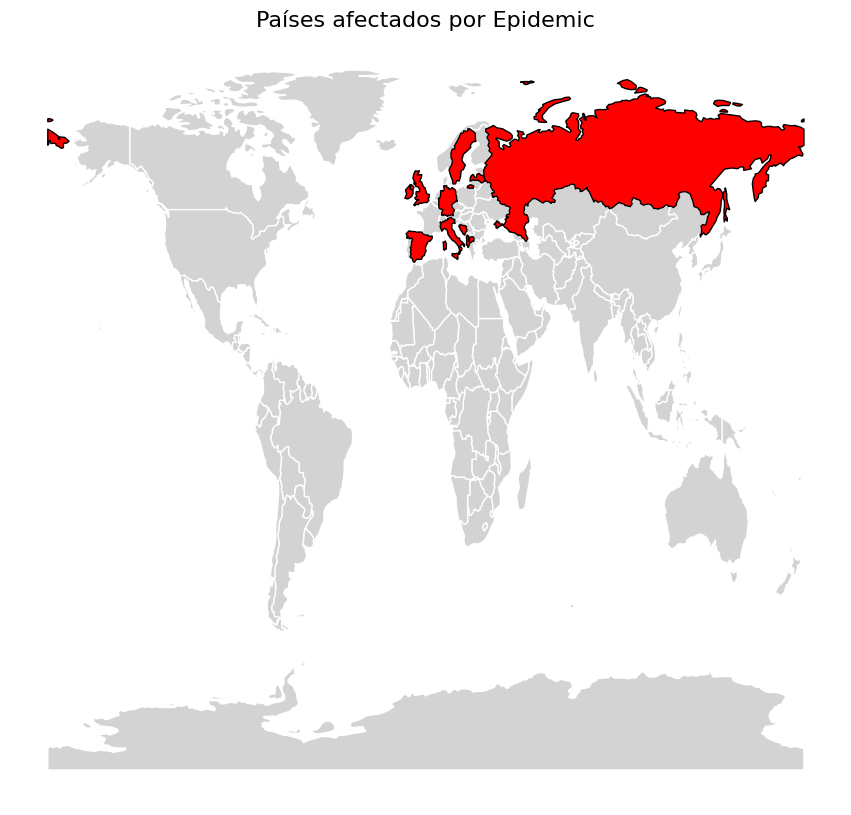

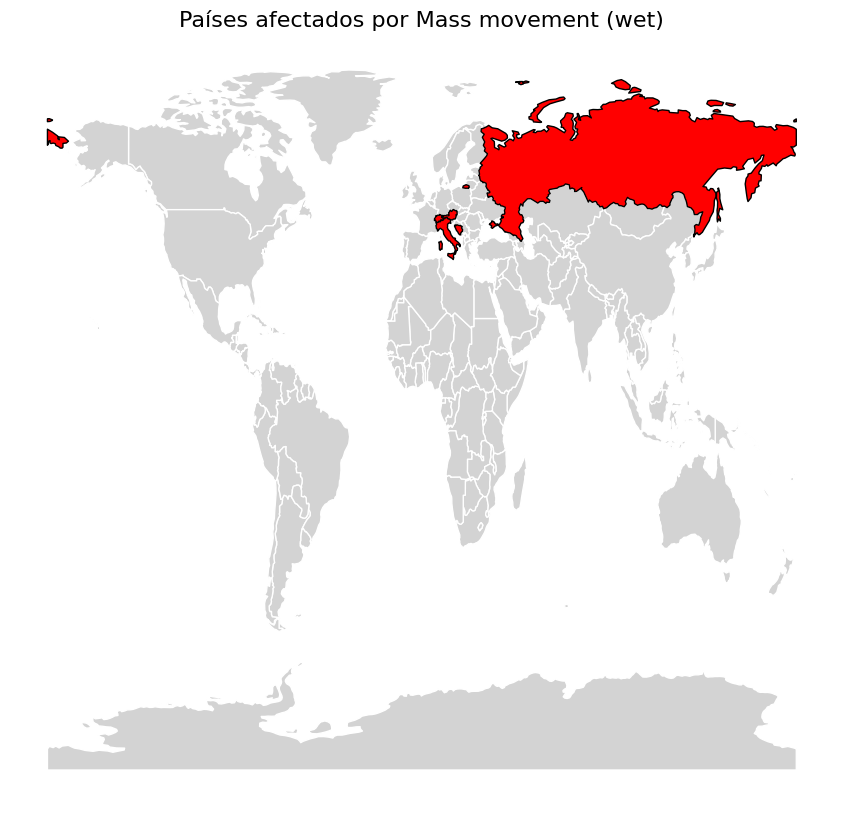

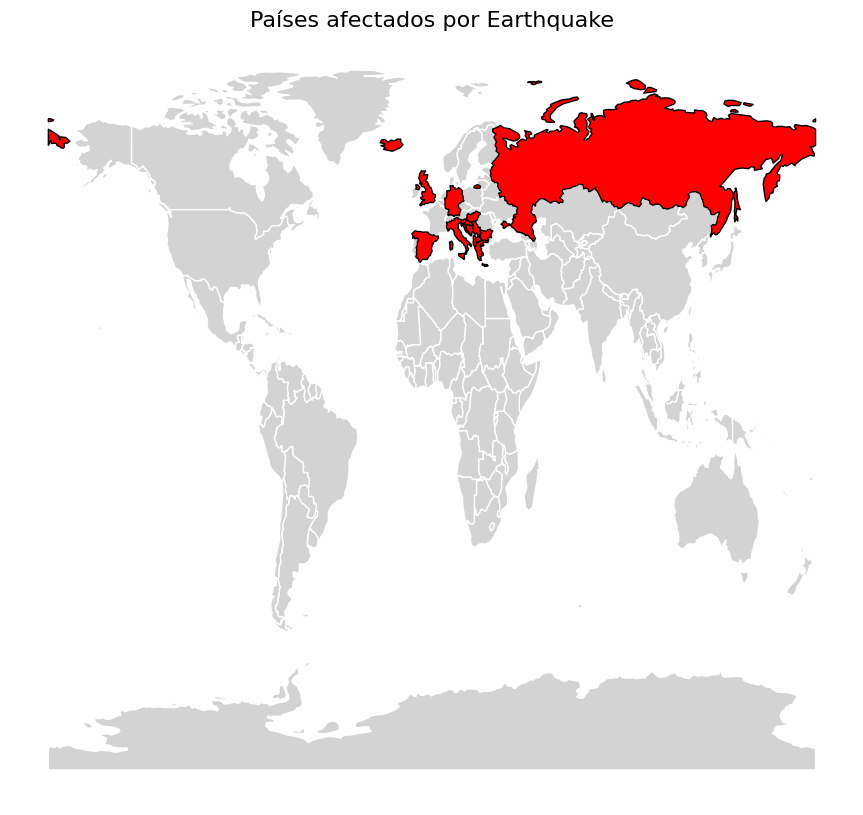

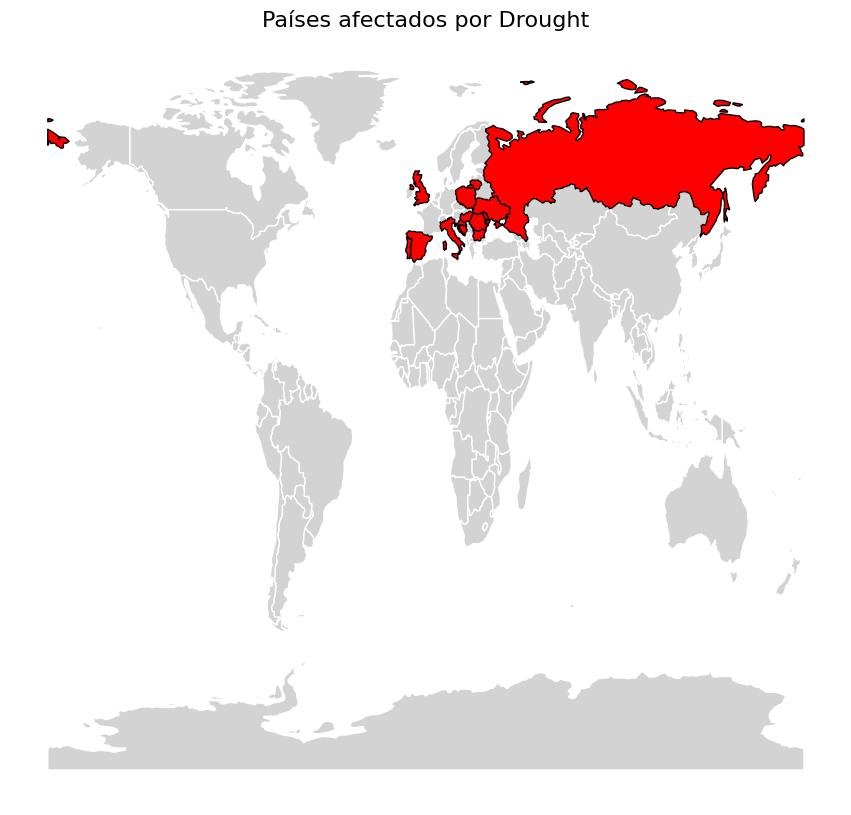

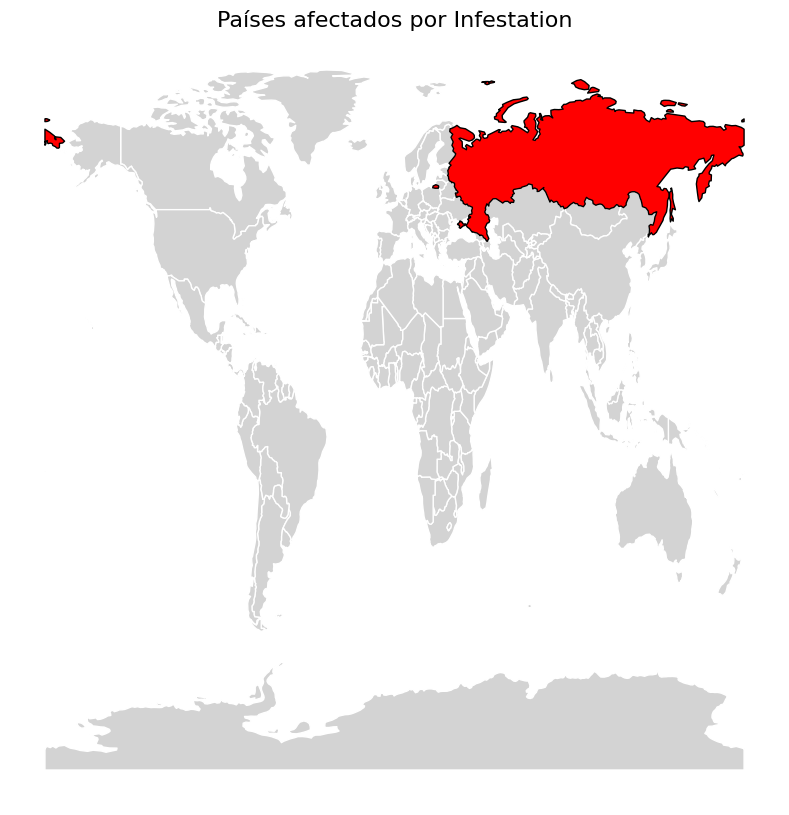

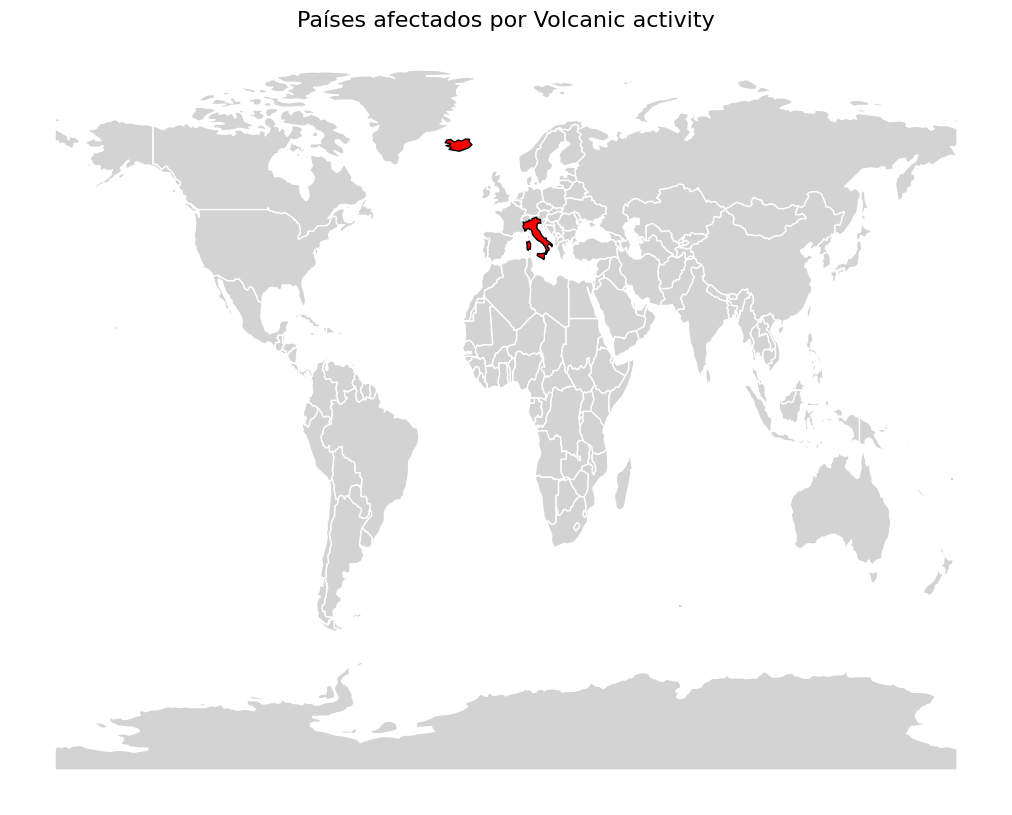

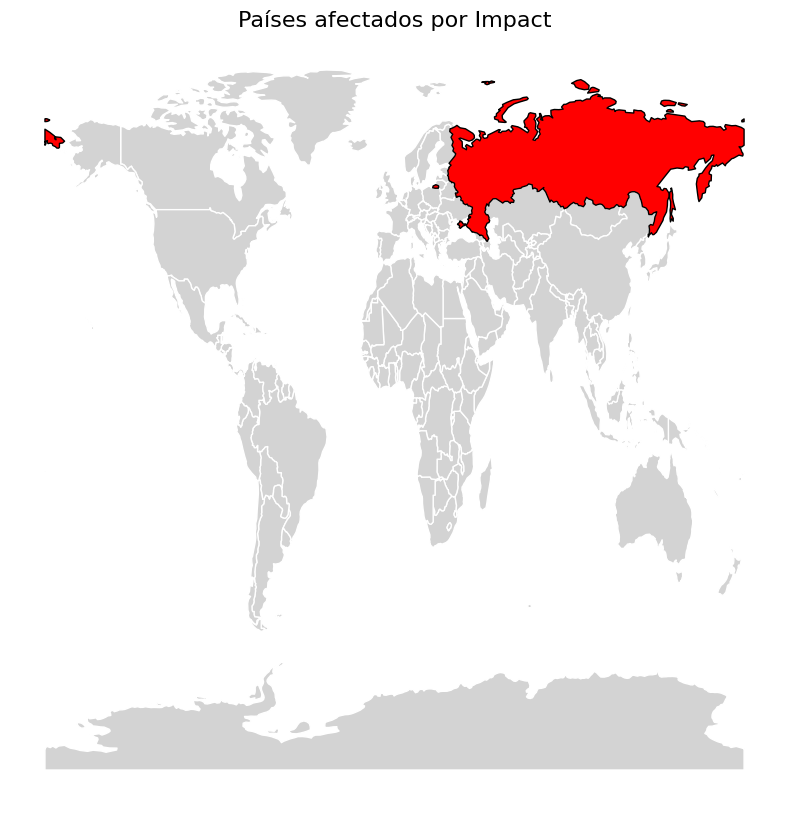

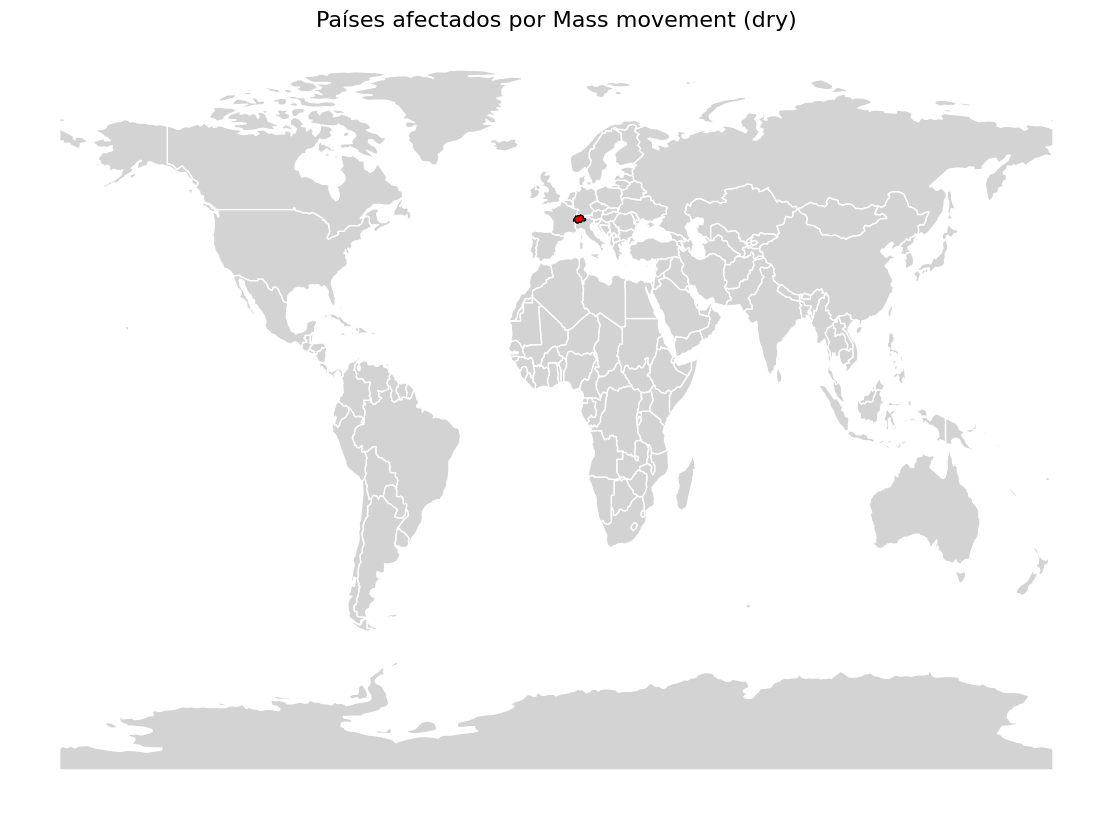

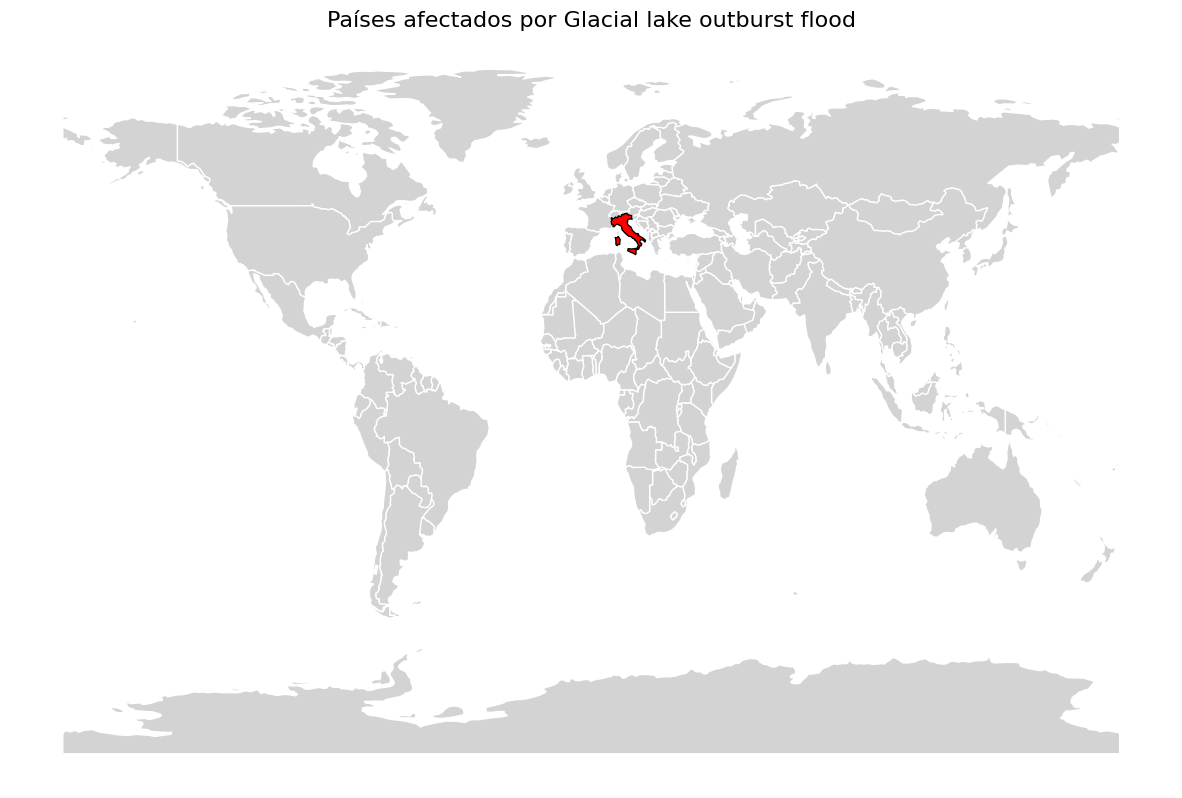

In [23]:
for tipo in tipos_desastres:
    df_tipo = df[df['Disaster Type'] == tipo].drop_duplicates(subset=['ISO'])  # evitamos repetidos
    df_tipo['has_event'] = True
    
    merged = world.merge(df_tipo, left_on='ISO_A3', right_on='ISO', how='left')
    
    fig, ax = plt.subplots(figsize=(15, 10))
    world.plot(ax=ax, color='lightgrey', edgecolor='white')  # países base
    merged[merged['has_event'] == True].plot(ax=ax, color='red', edgecolor='black')  # países afectados
    
    plt.title(f"Países afectados por {tipo}", fontsize=16)
    plt.axis('off')
    plt.show()

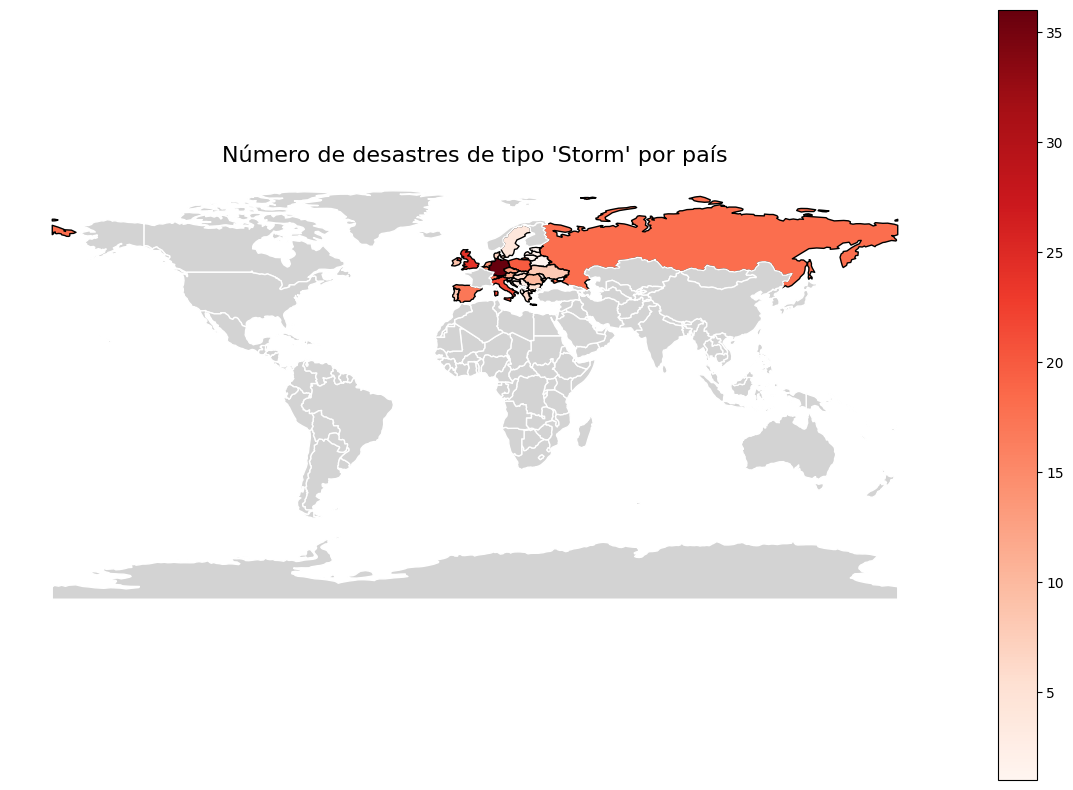

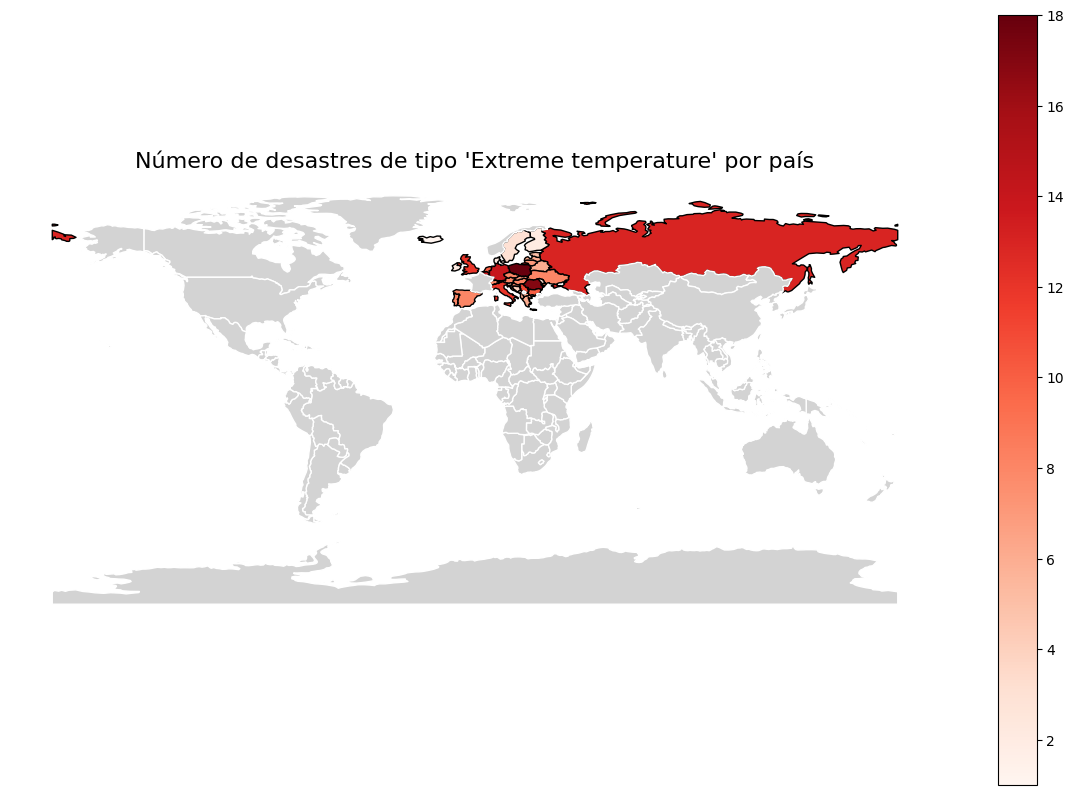

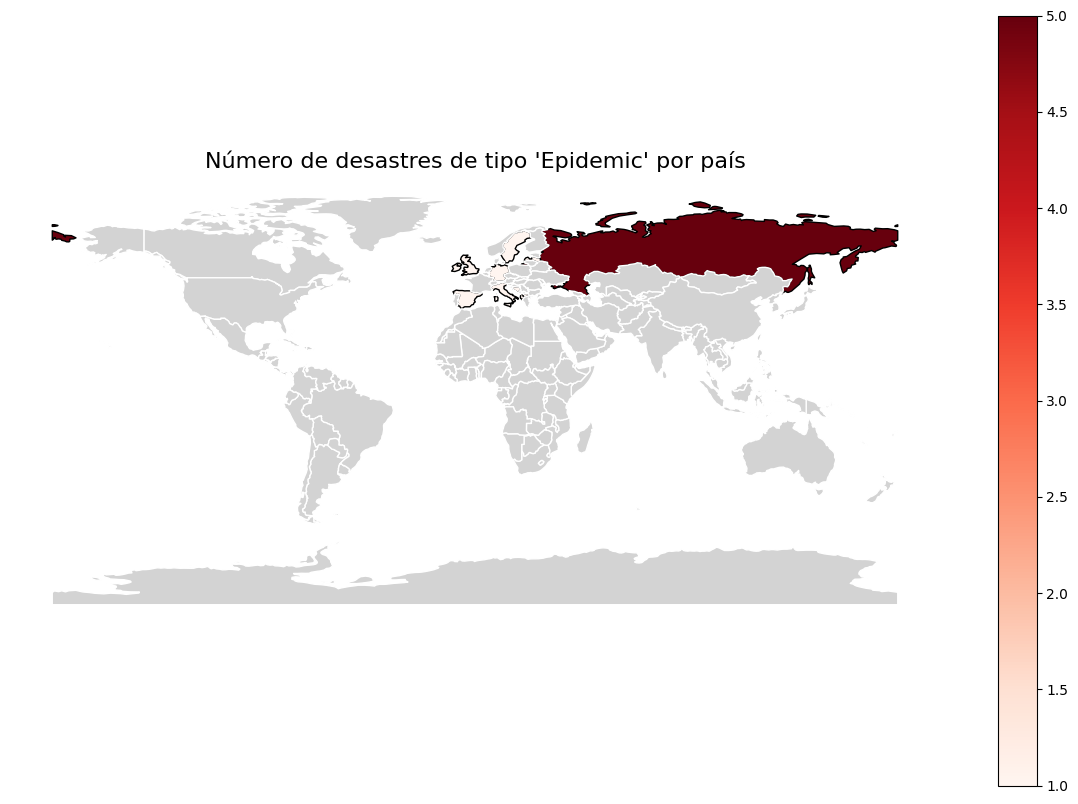

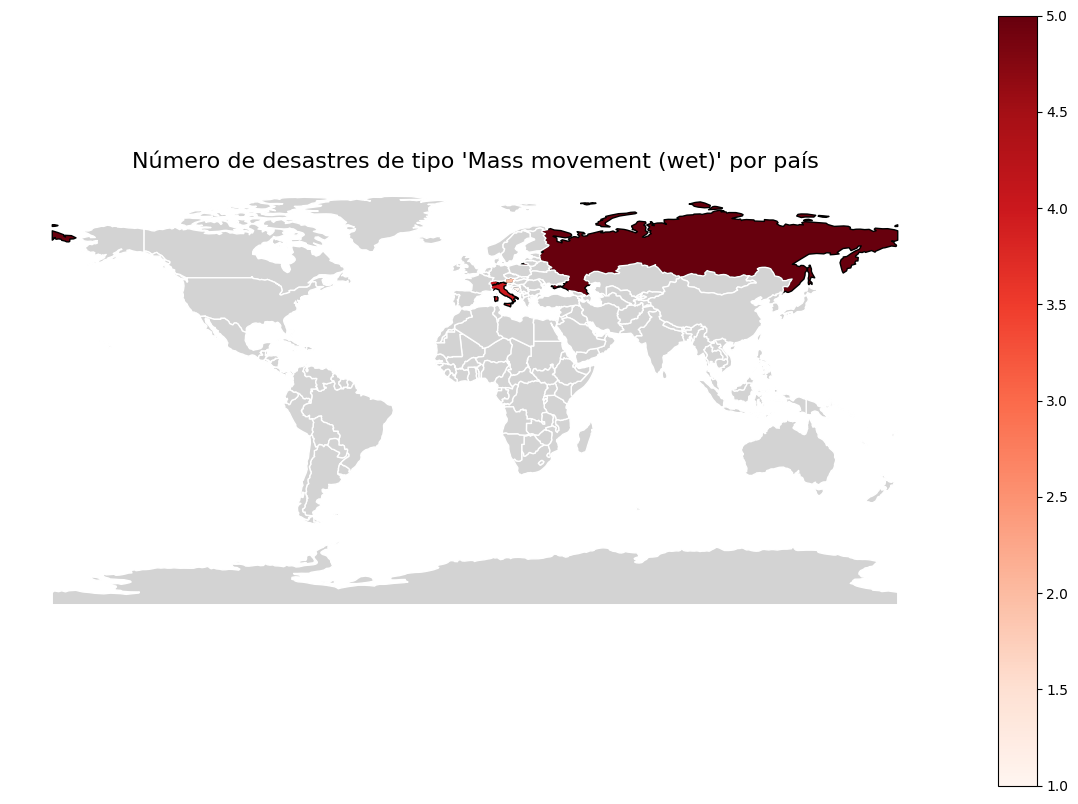

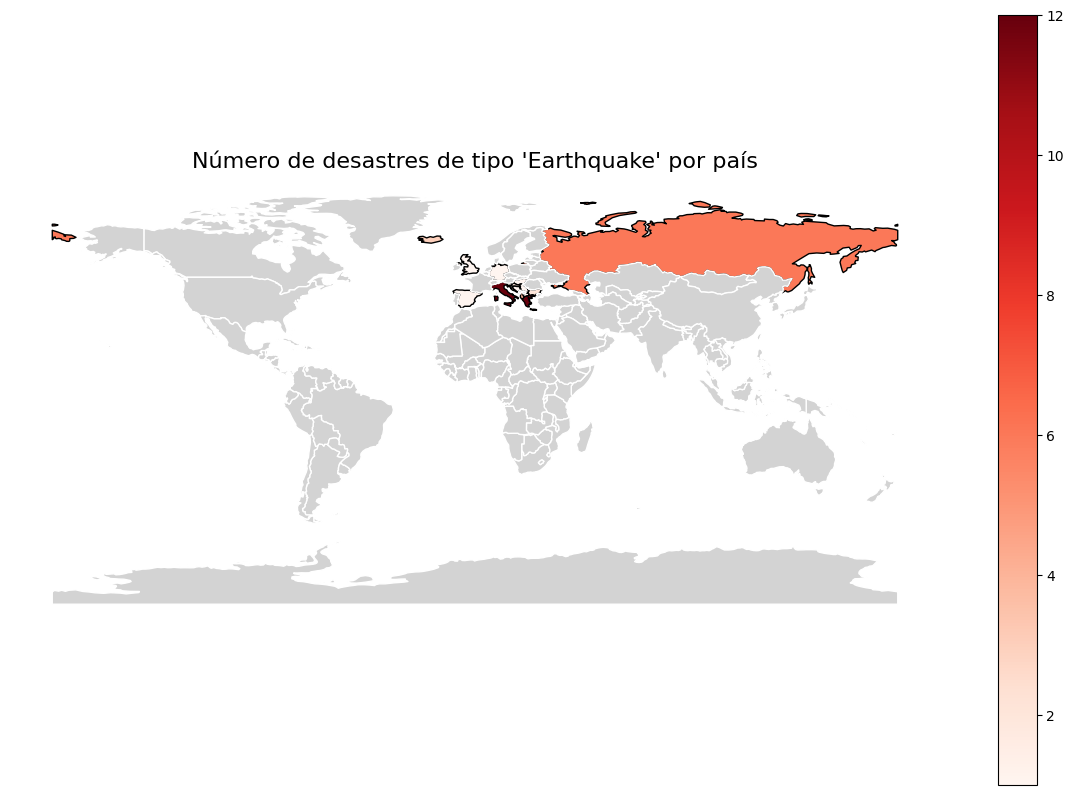

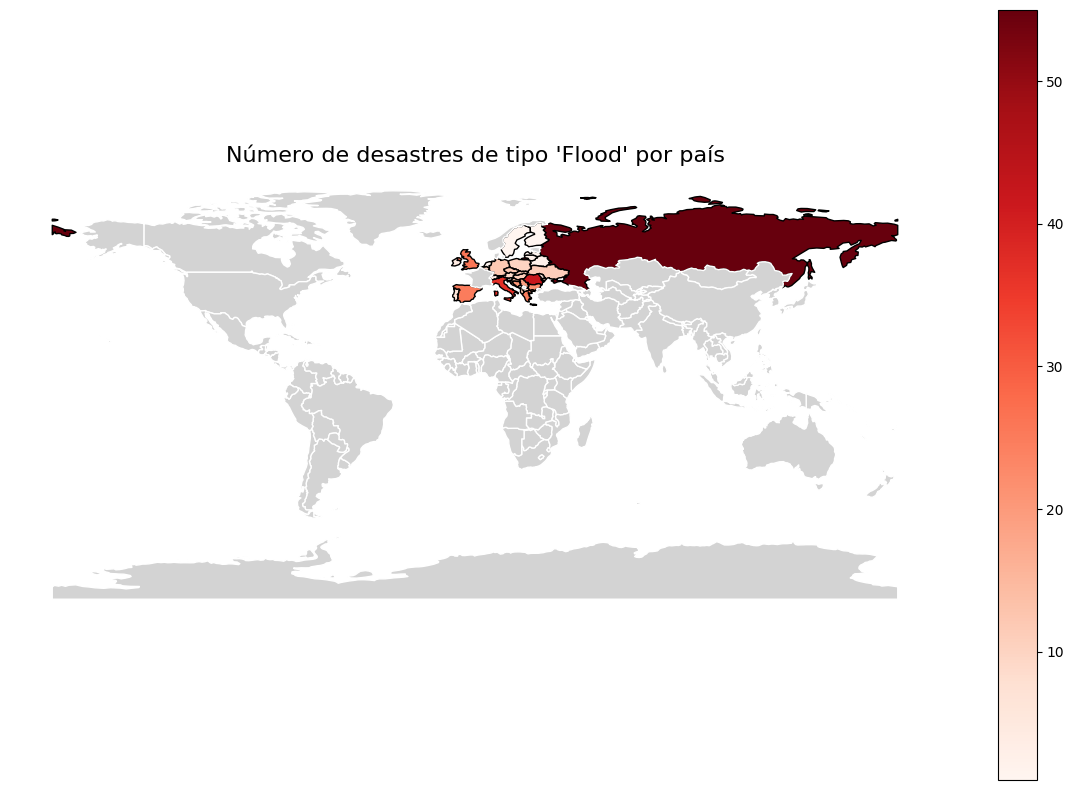

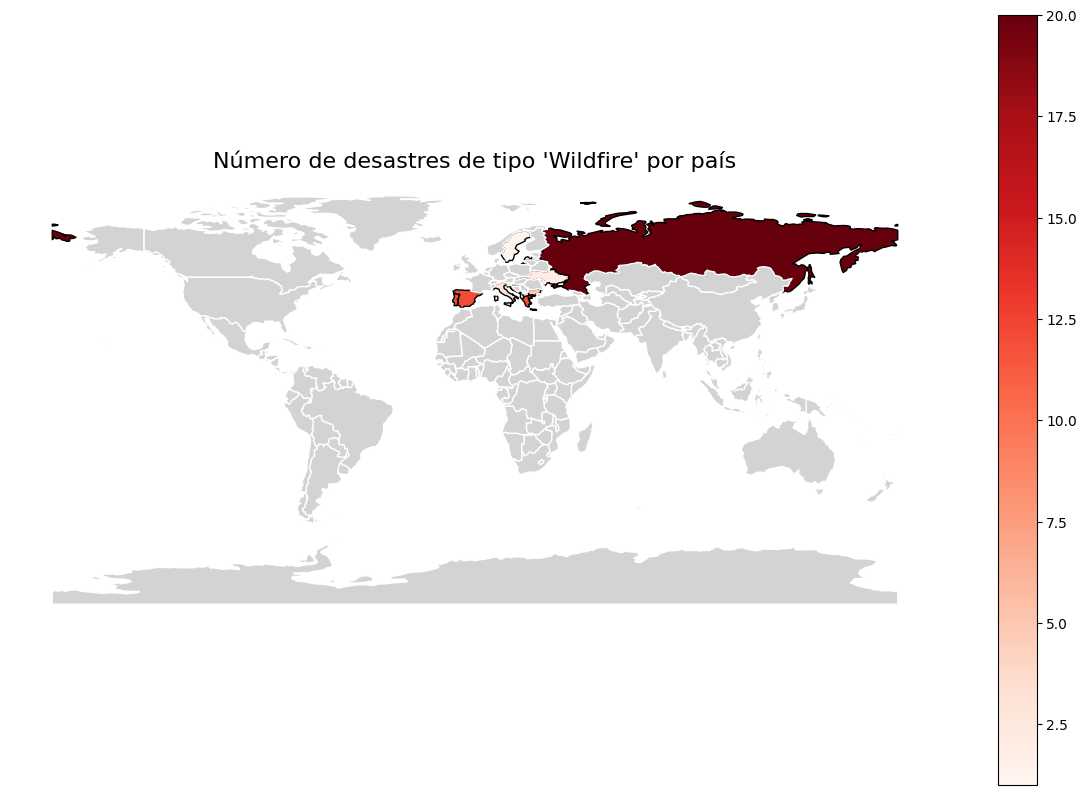

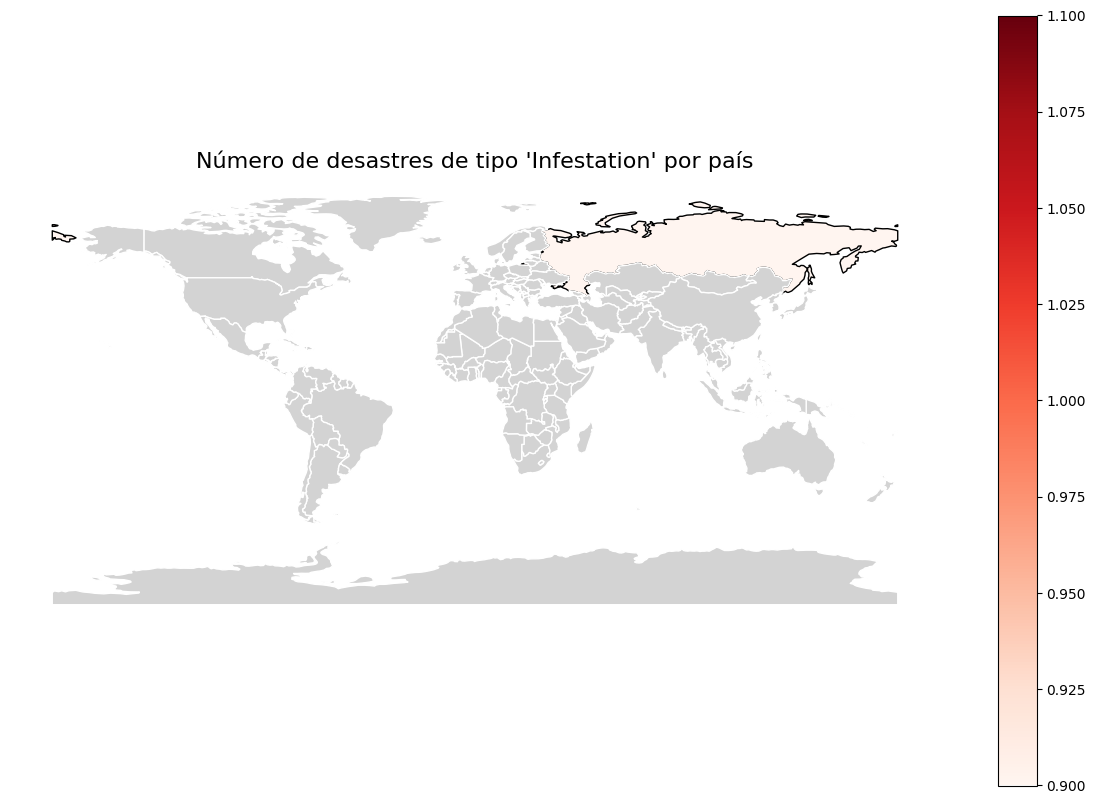

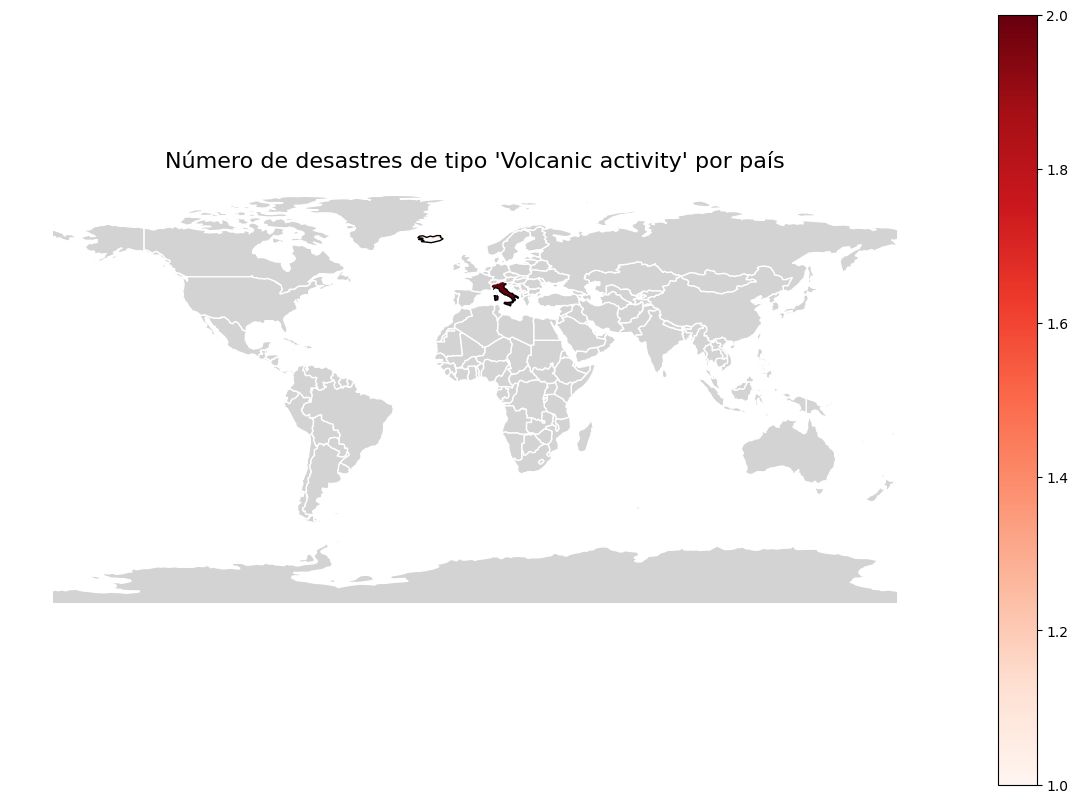

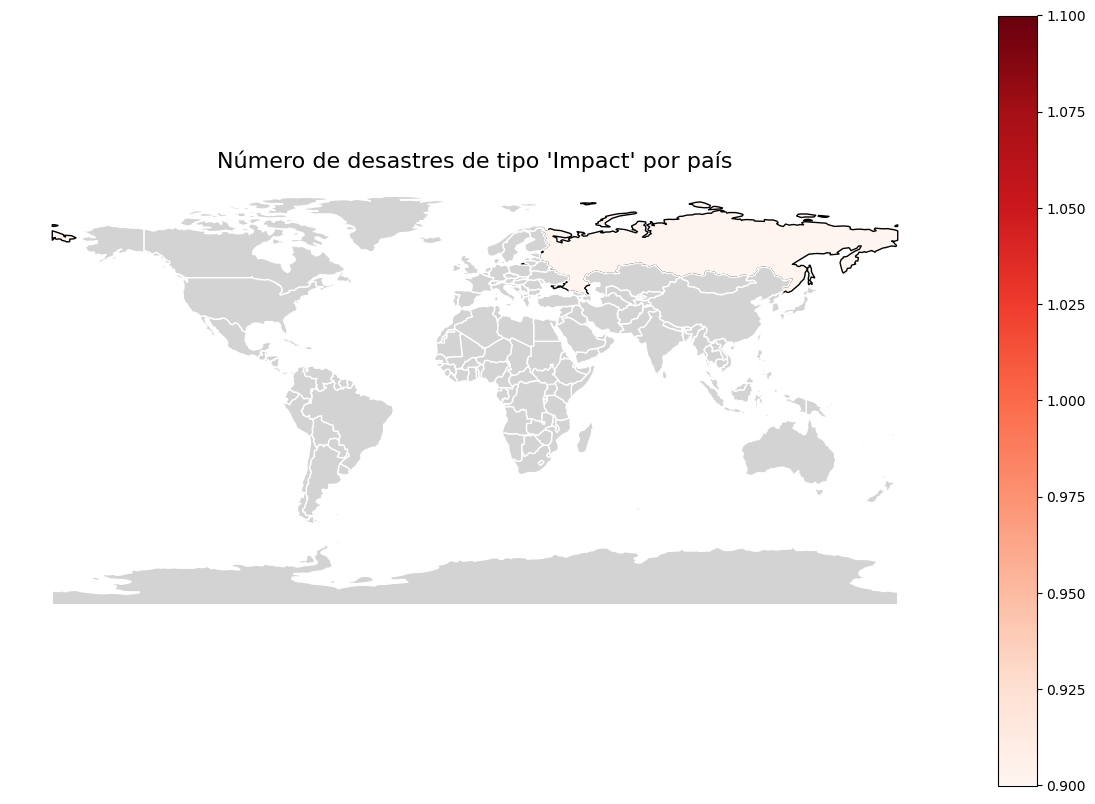

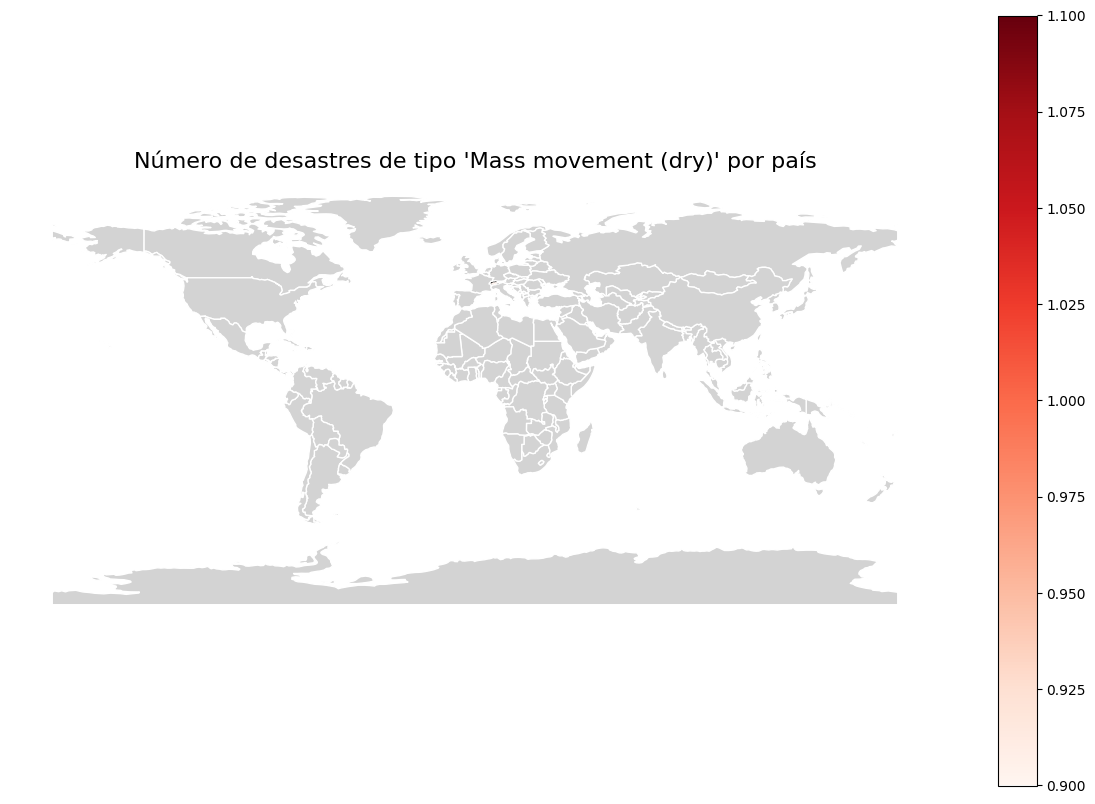

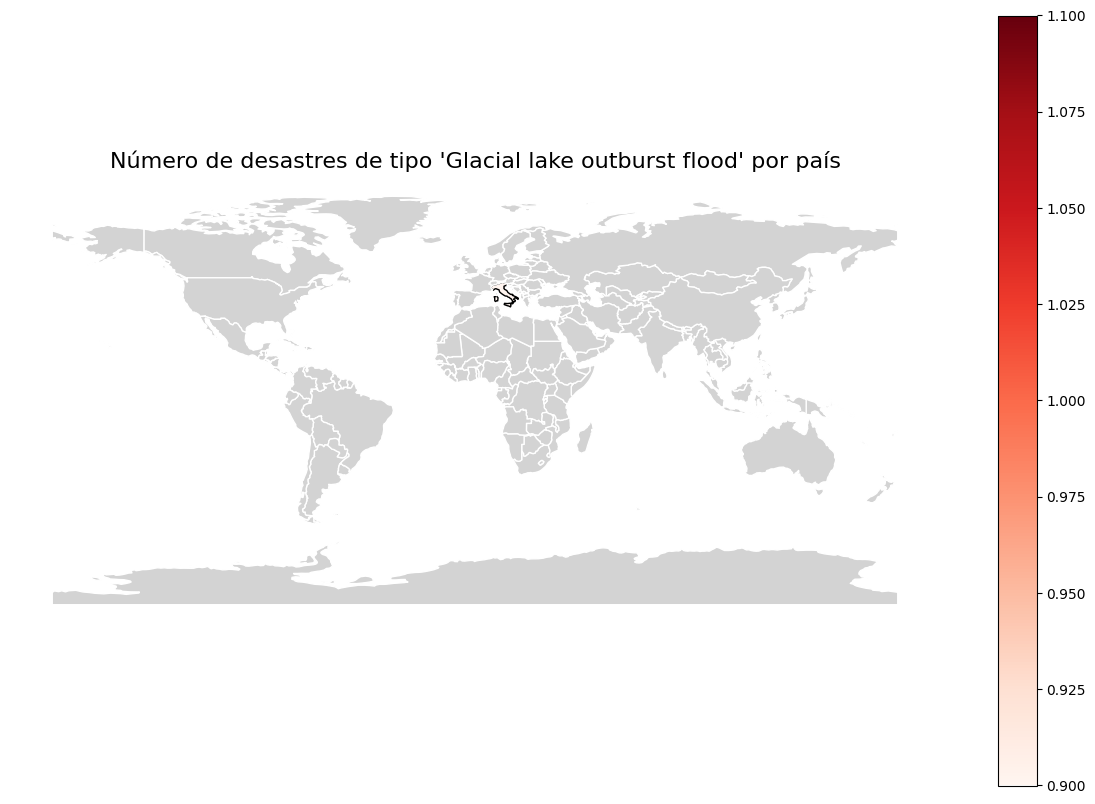

In [24]:
for tipo in tipos_desastres:
    # Contar cuántos desastres de este tipo ocurrieron por país
    df_tipo = df[df['Disaster Type'] == tipo]
    conteo = df_tipo.groupby('ISO').size().reset_index(name='event_count')
    
    # Unir con el mapa mundial
    merged = world.merge(conteo, left_on='ISO_A3', right_on='ISO', how='left')
    
    # Plot
    fig, ax = plt.subplots(figsize=(15, 10))
    merged.plot(
        ax=ax,
        column='event_count',
        cmap='Reds',
        legend=True,
        edgecolor='black',
        missing_kwds={
            "color": "lightgrey",
            "edgecolor": "white",
            "label": "Sin datos"
        }
    )
    
    plt.title(f"Número de desastres de tipo '{tipo}' por país", fontsize=16)
    plt.axis('off')
    plt.show()

In [25]:
grouped = df.groupby(['Disaster Type', 'ISO']).size().reset_index(name='event_count')

# Obtener tipos únicos
tipos_desastres = grouped['Disaster Type'].unique()

# Crear mapa interactivo para cada tipo
for tipo in tipos_desastres:
    df_tipo = grouped[grouped['Disaster Type'] == tipo]

    fig = px.choropleth(
        df_tipo,
        locations='ISO',
        color='event_count',
        hover_name='ISO',
        color_continuous_scale='Reds',
        projection='natural earth',
        title=f"Eventos de tipo '{tipo}' por país"
    )

    fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
    fig.show()

In [28]:
import pandas as pd
import plotly.express as px

# 1. Agrupar los datos
df_grouped = (
    df.groupby(['Start Year', 'Disaster Type', 'ISO'])
      .size()
      .reset_index(name='event_count')
)

# 2. Mapa interactivo con animación
fig = px.choropleth(
    df_grouped,
    locations='ISO',
    color='event_count',
    hover_name='ISO',
    animation_frame='Start Year',
    color_continuous_scale='OrRd',
    projection='natural earth',
    title="Desastres Naturales por Año y Tipo",
    facet_col='Disaster Type',  # Si quieres múltiples paneles por tipo
    #facet_col_wrap=2            # Para organizarlos en filas
)

# 3. Mejorar la apariencia
fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()


In [32]:
fig = px.choropleth(
    df_grouped,
    locations='ISO',
    color='event_count',
    hover_name='ISO',
    animation_frame='Start Year',
    color_continuous_scale='OrRd',
    projection='natural earth',
    title="Desastres Naturales por Año y Tipo",
    facet_col=None,
)

fig.update_layout(
    width=1200,  # Ancho del gráfico en píxeles
    height=700,  # Alto del gráfico en píxeles
    margin={"r":0,"t":50,"l":0,"b":0},
    updatemenus=[{
        'buttons': [
            {'method': 'restyle', 'label': tipo, 'args': [{'transforms': [{'type': 'filter', 'target': 'Disaster Type', 'operation': '=', 'value': tipo}]}]}
            for tipo in df_grouped['Disaster Type'].unique()
        ],
        'direction': 'down',
        'showactive': True,
        'x': 0.1,
        'xanchor': 'left',
        'y': 1.15,
        'yanchor': 'top'
    }]
)

fig.show()


In [34]:
fig = px.choropleth(
    df_grouped,
    locations='ISO',
    color='event_count',
    hover_name='ISO',
    animation_frame='Start Year',
    color_continuous_scale='OrRd',
    projection='natural earth',
    title="Desastres Naturales por Año y Tipo"
)

fig.update_layout(
    width=1200,
    height=700,
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()


In [36]:
# Asegúrate de tener los datos agrupados
df_grouped = (
    df.groupby(['Start Year', 'Disaster Type', 'ISO'])
      .size()
      .reset_index(name='event_count')
)

# Crear una traza (choropleth) por tipo de desastre
disaster_types = df_grouped['Disaster Type'].unique()
years = sorted(df_grouped['Start Year'].unique())

# Crear una figura vacía
fig = go.Figure()

# Agregar una traza por cada tipo de desastre
for disaster in disaster_types:
    filtered = df_grouped[df_grouped['Disaster Type'] == disaster]
    
    for year in years:
        year_data = filtered[filtered['Start Year'] == year]
        visible = (year == years[0])  # Solo mostrar el primer año al inicio

        fig.add_trace(go.Choropleth(
            locations=year_data['ISO'],
            z=year_data['event_count'],
            text=year_data['ISO'],
            colorscale='OrRd',
            colorbar_title='Eventos',
            zmin=0,
            zmax=df_grouped['event_count'].max(),
            visible=visible,
            name=disaster,
            hovertemplate='%{text}<br>Eventos: %{z}<extra></extra>'
        ))

# Total de trazas = len(disaster_types) * len(years)

# Construir los menús de selección
buttons = []
for i, disaster in enumerate(disaster_types):
    visibility = [False] * len(fig.data)
    for j, year in enumerate(years):
        trace_index = i * len(years) + j
        visibility[trace_index] = (year == years[0])  # Solo primer año visible
    buttons.append(dict(label=disaster, method='update', args=[{'visible': visibility}]))

# Slider para años
steps = []
for j, year in enumerate(years):
    step = {
        'method': 'update',
        'label': str(year),
        'args': [{'visible': [
            (i % len(years) == j) for i in range(len(fig.data))
        ]}]
    }
    steps.append(step)

# Layout
fig.update_layout(
    title='Desastres Naturales por País y Año',
    geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
    width=1200,
    height=700,
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.05,
        'xanchor': 'left',
        'y': 1.15,
        'yanchor': 'top'
    }],
    sliders=[{
        'active': 0,
        'steps': steps,
        'x': 0.1,
        'len': 0.9,
        'xanchor': 'left',
        'y': -0.05,
        'yanchor': 'bottom'
    }]
)

fig.show()
